In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import shap
import numpy as np
import scipy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy import stats as sps
from scipy.interpolate import interp1d
from IPython.display import clear_output
import seaborn as sns
sns.set_style("whitegrid", {'grid.linewidth': 0.1})
plt.rcParams["font.family"] = "Times New Roman"


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [32]:
df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//ch4.csv")
df

,Year,Population,Total CH4 Emisssion (Gg),CH4 Emisssion from Industrial waste (Gg),CH4 Emisssion from MSW (Gg)
0,1970,298.084,2.39,1.03,1.36
1,1971,344.513,2.65,1.13,1.51
2,1972,392.368,2.96,1.26,1.69
3,1973,441.546,3.34,1.42,1.92
4,1974,491.955,3.80,1.61,2.20
5,1975,543.394,4.40,1.87,2.53
6,1976,614.177,5.09,2.17,2.92
7,1977,706.861,5.96,2.58,3.38
8,1978,805.231,7.04,3.12,3.92
9,1979,908.452,8.12,3.59,4.53


In [38]:
import pandas as pd

df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//ch4.csv")
df = df.drop(["Year","Total CH4 Emisssion (Gg)","CH4 Emisssion from Industrial waste (Gg)"], axis=1)
df

,Population,CH4 Emisssion from MSW (Gg)
0,298.084,1.36
1,344.513,1.51
2,392.368,1.69
3,441.546,1.92
4,491.955,2.20
5,543.394,2.53
6,614.177,2.92
7,706.861,3.38
8,805.231,3.92
9,908.452,4.53


In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df is your DataFrame
# Extract features and target variable
X = df.drop(['CH4 Emisssion from MSW (Gg)'], axis=1).values
y = df['CH4 Emisssion from MSW (Gg)'].values

# Reshape X for RNN input (assuming each row is a time sequence)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the architecture of the RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the RNN
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate Willmott's Index of Agreement
numerator = np.sum(np.abs(y_test - y_pred))
denominator = np.sum(np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test)))
WIA = 1 - (numerator / denominator)
print(f"Willmott's Index of Agreement: {WIA}")

# Calculate MAD (%)
mad_percentage = 100 * np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)
print(f"MAD (%): {mad_percentage}")

# Calculate MBD (%)
mbd_percentage = 100 * np.mean(y_test - y_pred) / np.mean(y_test)
print(f"MBD (%): {mbd_percentage}")


1/1 [==============================] - 0s 197ms/step
R-squared: 0.8475135149943254
RMSE: 9.81962893485291
Willmott's Index of Agreement: 0.8418999798922947
MAD (%): 21.4038778606214
MBD (%): -13.540424830839536


In [9]:
df1 =pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//population.csv")
df1 

,Variant,Medium,High,Low
0,2022,9441.129,9449.178,9433.079
1,2023,9516.871,9540.915,9492.826
2,2024,9591.853,9631.674,9552.035
3,2025,9665.319,9720.664,9609.976
4,2026,9737.048,9807.632,9666.461
5,2027,9806.692,9896.649,9716.734
6,2028,9874.281,9987.640,9760.923
7,2029,9940.085,10076.374,9803.799
8,2030,10004.319,10163.147,9845.495
9,2031,10067.403,10248.495,9886.311


In [15]:
#For Prediction
df1 =pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//population.csv")

X = df1.drop(["Variant", "Low", "Medium"], axis=1).values

# Reshape X for RNN input (assuming each row is a time sequence)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X

array([[[ 9449.178]],

       [[ 9540.915]],

       [[ 9631.674]],

       [[ 9720.664]],

       [[ 9807.632]],

       [[ 9896.649]],

       [[ 9987.64 ]],

       [[10076.374]],

       [[10163.147]],

       [[10248.495]],

       [[10336.013]],

       [[10426.263]],

       [[10517.17 ]],

       [[10609.522]],

       [[10703.802]],

       [[10800.508]],

       [[10899.89 ]],

       [[11002.146]],

       [[11107.601]],

       [[11216.487]],

       [[11328.367]],

       [[11442.888]],

       [[11559.794]],

       [[11678.155]],

       [[11797.123]],

       [[11916.303]],

       [[12035.279]],

       [[12153.61 ]],

       [[12270.98 ]]])

In [16]:
y_pred_f = model.predict(X)
data=pd.DataFrame(y_pred_f)
data.to_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//data.csv")

1/1 [==============================] - 0s 110ms/step


In [14]:
df1= pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//UNPop.csv")
df1

,Year,Medium,High,Low
0,1970,0.298084,NaN,NaN
1,1971,0.344513,NaN,NaN
2,1972,0.392368,NaN,NaN
3,1973,0.441546,NaN,NaN
4,1974,0.491955,NaN,NaN
...,...,...,...,...
76,2046,11.135424,11.797123,10.475646
77,2047,11.215445,11.916303,10.517345
78,2048,11.294748,12.035279,10.557981
79,2049,11.372877,12.153610,10.597148


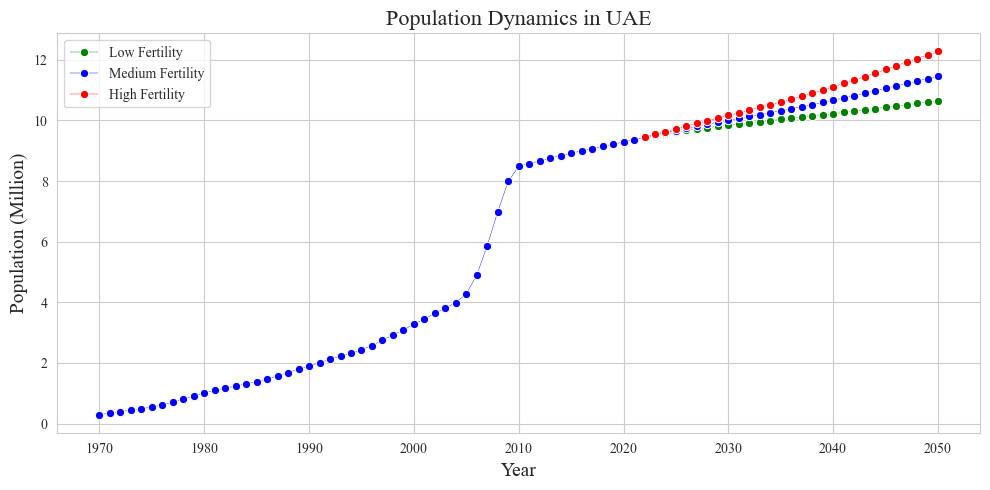

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='Low',  data=df1,  linewidth=.3,label='Low Fertility',  marker="o", color="Green")
sns.lineplot(x='Year', y='Medium',  data=df1,  linewidth=.3,label='Medium Fertility',  marker="o", color="Blue")
sns.lineplot(x='Year', y='High',  data=df1,  linewidth=.3,label='High Fertility', marker="o", color="Red")

plt.title('Population Dynamics in UAE', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (Million)', fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//UAE_POP.jpg", dpi=1200)
plt.show()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

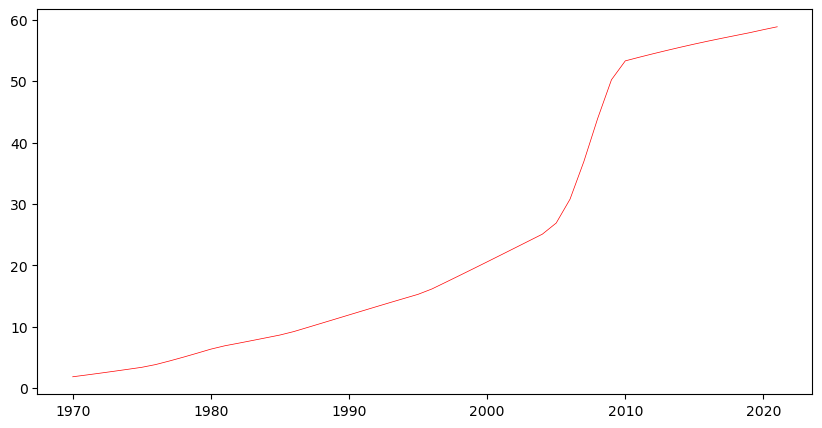

In [2]:
df1= pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_MSW.csv")
df2= pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//data.csv")

fig, ax = plt.subplots(figsize=(10, 5))


sns.lineplot(x='Year', y='CH4 Emisssion from MSW (Gg)',  data=df1,  linewidth=.5, color="Red")

plt.title('CH4 Emisssion from MSW (Gg)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('SLR (m)', fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()


In [28]:

# Assuming df1 and df2 are your DataFrames
df1 = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_MSW.csv")
df1

,Year,CH4 Emisssion from MSW (Gg),Low Fertility,Medium Fertility,High Fertility
0,1970,1.830507,NaN,NaN,NaN
1,1971,2.122634,NaN,NaN,NaN
2,1972,2.423735,NaN,NaN,NaN
3,1973,2.733168,NaN,NaN,NaN
4,1974,3.050333,NaN,NaN,NaN
...,...,...,...,...,...
76,2046,NaN,65.867645,70.01883,74.182396
77,2047,NaN,66.129974,70.52237,74.932076
78,2048,NaN,66.385735,71.02139,75.680670
79,2049,NaN,66.632110,71.51300,76.425360


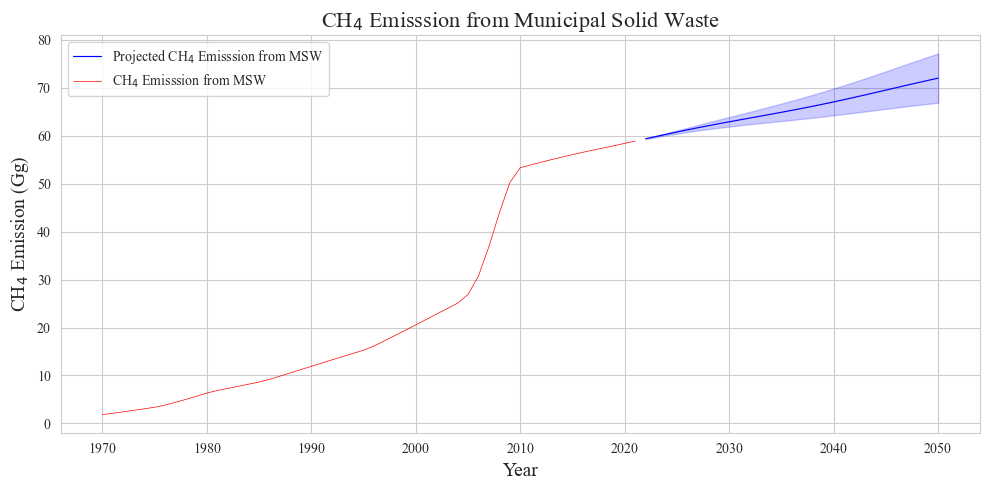

In [29]:

# Your DataFrame (df1, df2, df3)
# ...

# Melt the DataFrames
df_melted1 = pd.melt(df1, id_vars=['Year'], value_vars=['Low Fertility','Medium Fertility','High Fertility'])

fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='value',  data=df_melted1,  linewidth=0.85,label='Projected CH$_4$ Emisssion from MSW', color="Blue")
sns.lineplot(x='Year', y='CH4 Emisssion from MSW (Gg)',  data=df1,  linewidth=.5,label='CH$_4$ Emisssion from MSW', color="Red")

plt.title('CH$_4$ Emisssion from Municipal Solid Waste', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CH$_4$ Emission (Gg)', fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_MSW.jpg", dpi=1200)
plt.show()


In [16]:
df1 = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_total.csv")
df1

,Year,Total CH4 Emisssion (Gg),Low Fertility,Medium Fertility,High Fertility
0,1970,4.714817,NaN,NaN,NaN
1,1971,5.442962,NaN,NaN,NaN
2,1972,6.193460,NaN,NaN,NaN
3,1973,6.964715,NaN,NaN,NaN
4,1974,7.755271,NaN,NaN,NaN
...,...,...,...,...,...
76,2046,NaN,164.32823,174.67564,185.05296
77,2047,NaN,164.98247,175.93034,186.92162
78,2048,NaN,165.61974,177.17406,188.78777
79,2049,NaN,166.23387,178.39952,190.64384


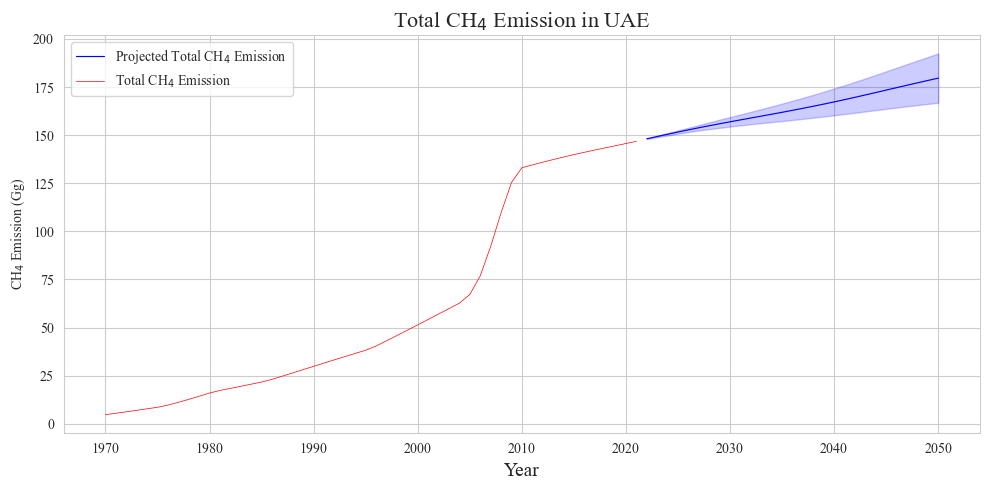

In [18]:
# Melt the DataFrames
df_melted1 = pd.melt(df1, id_vars=['Year'], value_vars=['Low Fertility','Medium Fertility','High Fertility'])

fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='value',  data=df_melted1,  linewidth=0.85,label='Projected Total CH$_4$ Emission', color="Blue")
sns.lineplot(x='Year', y='Total CH4 Emisssion (Gg)',  data=df1,  linewidth=.5,label='Total CH$_4$ Emission', color="Red")

plt.title('Total CH$_4$ Emission in UAE', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CH$_4$ Emission (Gg)') #fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_total.jpg", dpi=1200)
plt.show()


In [2]:
df1 = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_IW.csv")
df2 = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_MSW.csv")

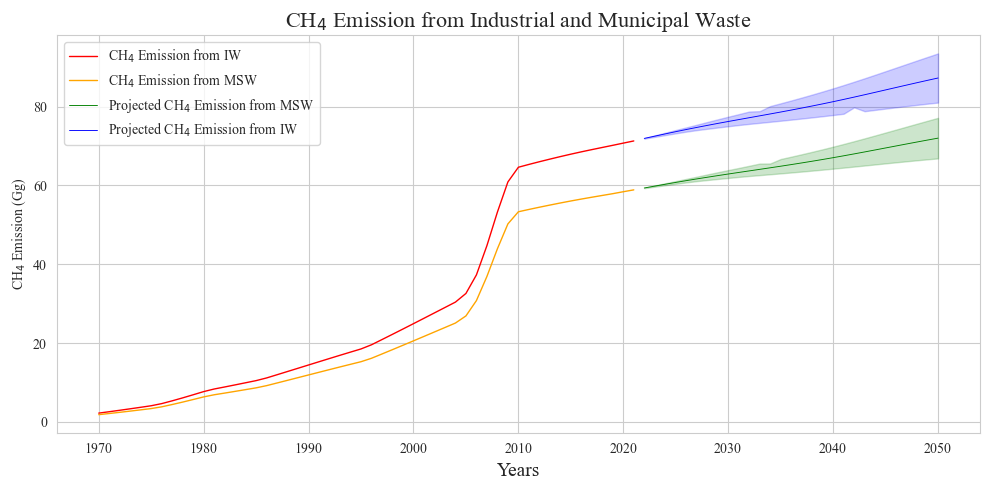

In [15]:
# Melt the DataFrames
df_melted1 = pd.melt(df1, id_vars=['Year'], value_vars=['Low Fertility','Medium Fertility','High Fertility'])
df_melted2 = pd.melt(df2, id_vars=['Year'], value_vars=['Low Fertility','Medium Fertility','High Fertility'])

fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='CH4 Emisssion from Industrial waste (Gg)',  data=df1,  linewidth=1,label='CH$_4$ Emission from IW', color="Red")
sns.lineplot(x='Year', y='CH4 Emisssion from MSW (Gg)',  data=df2,  linewidth=1,label='CH$_4$ Emission from MSW', color="Orange")

sns.lineplot(x='Year', y='value',  data=df_melted2,  linewidth=0.65,label='Projected CH$_4$ Emission from MSW', color="Green")
sns.lineplot(x='Year', y='value',  data=df_melted1,  linewidth=0.65,label='Projected CH$_4$ Emission from IW', color="Blue")



plt.title('CH$_4$ Emission from Industrial and Municipal Waste', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('CH$_4$ Emission (Gg)') #fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//final_I_MSW.jpg", dpi=1200)
plt.show()


In [7]:
df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//MSW_data.csv")
df

,Year,Recycling,Composting,Landfill,Dumpsite,Total,Low,Medium,High
0,2012,197590.0,216000.0,103120.0,755958.0,1272668.0,NaN,NaN,NaN
1,2013,244495.0,259776.0,122247.0,901575.0,1528093.0,NaN,NaN,NaN
2,2014,88555.0,146636.0,149298.0,1082101.0,1466590.0,NaN,NaN,NaN
3,2015,329470.0,148246.0,154209.0,1047058.0,1678983.0,NaN,NaN,NaN
4,2016,266109.0,151133.0,164387.0,980050.0,1561680.0,NaN,NaN,NaN
5,2017,268302.0,148866.0,177932.0,777040.0,1372140.0,NaN,NaN,NaN
6,2018,596476.0,84068.0,527261.0,585737.0,1793542.0,1793542.0,1793542.0,1793542.0
7,2019,NaN,NaN,NaN,NaN,NaN,1955994.0,1963938.0,1971881.0
8,2020,NaN,NaN,NaN,NaN,NaN,2118446.0,2134333.0,2150221.0
9,2021,NaN,NaN,NaN,NaN,NaN,2280899.0,2304729.0,2328560.0


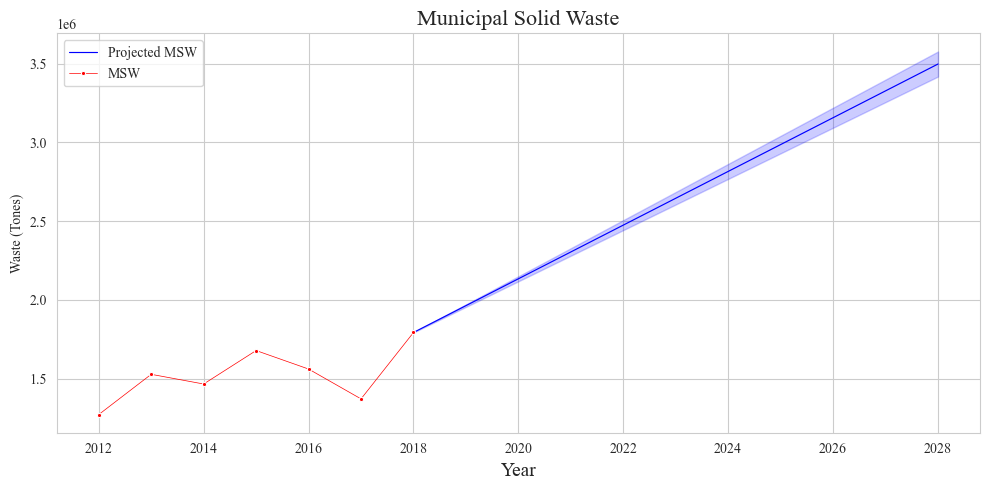

In [10]:
# Melt the DataFrames
df_melted1 = pd.melt(df, id_vars=['Year'], value_vars=['Low','Medium','High'])

fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='value',  data=df_melted1,  linewidth=0.85,label='Projected MSW', color="Blue")
sns.lineplot(x='Year', y='Total',  data=df,  linewidth=.5,label='MSW', color="Red", marker=".")

plt.title('Municipal Solid Waste', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Waste (Tones)') #fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//MSW.jpg", dpi=1200)
plt.show()


In [4]:
df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//train_test.csv")
df

,Year,Total CH4 Emisssion (Gg),test_total,CH4 Emisssion from Industrial waste (Gg),test_ISW,CH4 Emisssion from MSW (Gg),test_MSW
0,1970,4.714817,2.39,2.223062,1.03,1.830507,1.36
1,1971,5.442962,2.65,2.577074,1.13,2.122634,1.51
2,1972,6.193460,2.96,2.941963,1.26,2.423735,1.69
3,1973,6.964715,3.34,3.316936,1.42,2.733168,1.92
4,1974,7.755271,3.80,3.701309,1.61,3.050333,2.20
5,1975,8.561997,4.40,4.093525,1.87,3.373995,2.53
6,1976,9.672067,5.09,4.633232,2.17,3.819351,2.92
7,1977,11.125607,5.96,5.339939,2.58,4.402520,3.38
8,1978,12.668344,7.04,6.090011,3.12,5.021471,3.92
9,1979,14.287175,8.12,6.877044,3.59,5.670929,4.53


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


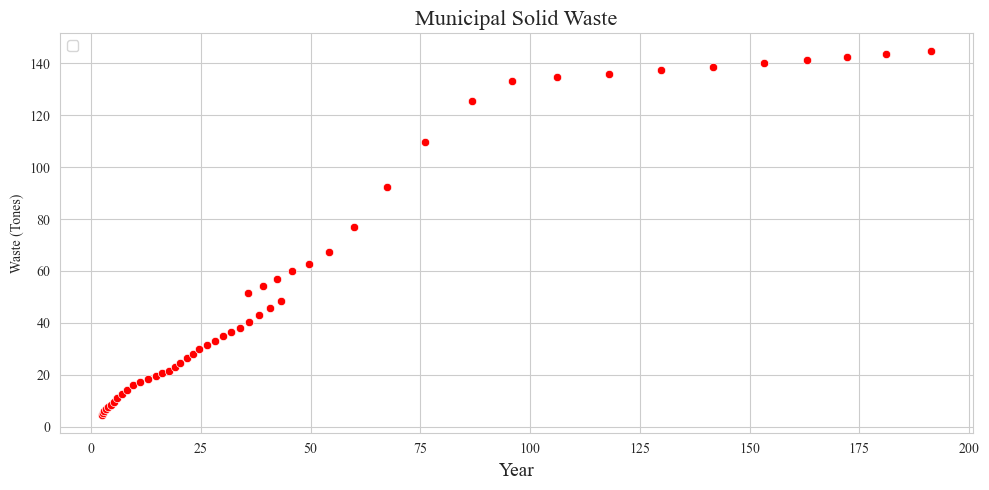

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create the line plot with custom colors using palette

palette = ["viridis"]  # Specify custom colors here
sns.scatterplot(x='test_total', y='Total CH4 Emisssion (Gg)',  data=df, color="Red")
plt.title('Municipal Solid Waste', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Waste (Tones)') #fontsize=14)
plt.legend(loc='upper left', fontsize=10)  # bbox_to_anchor=(1.05, 1), 
plt.grid(True)
plt.tight_layout()

#plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//MSW.jpg", dpi=1200)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


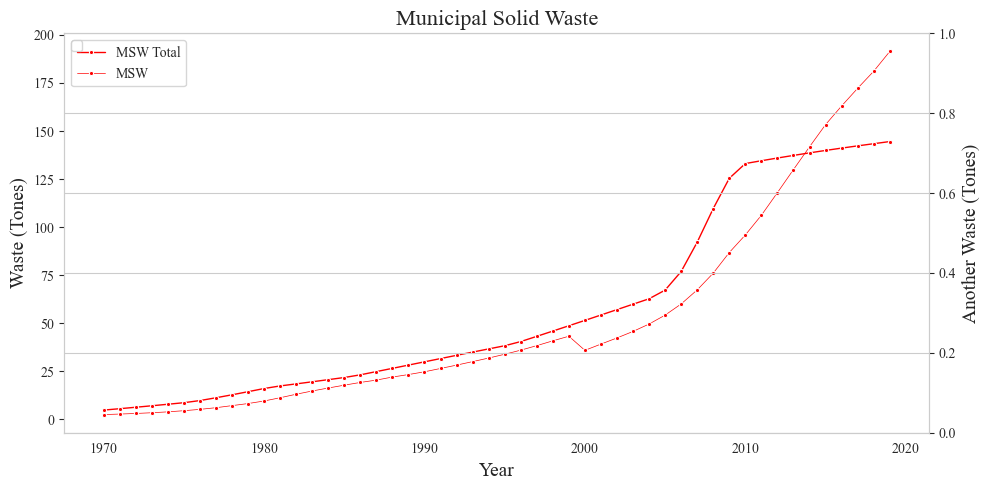

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 and df2 are two different datasets with different columns

fig, ax1 = plt.subplots(figsize=(10, 5))

# Create the first line plot
palette1 = ["viridis"]  # Specify custom colors here
sns.lineplot(x='Year', y='Total CH4 Emisssion (Gg)',  data=df, linewidth=1, label='MSW Total', color="Red", marker=".", ax=ax1)
sns.lineplot(x='Year', y='test_total',  data=df,  linewidth=.5,label='MSW', color="Red", marker=".")

ax1.set_title('Municipal Solid Waste', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Waste (Tones)', fontsize=14)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(False)

# Create the second line plot as a twin plot
ax2 = ax1.twinx()
palette2 = ["plasma"]  # Specify custom colors here
#sns.lineplot(x='Year', y='CH4 Emisssion from Industrial waste (Gg)',  data=df, linewidth=.5, label='Another MSW', color="Green", marker=".", ax=ax2)
#sns.lineplot(x='Year', y='test_ISW',  data=df,  linewidth=.5,label='MSW', color="Red", marker=".")

ax2.set_ylabel('Another Waste (Tones)', fontsize=14)
ax2.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


In [5]:
df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//data//waste_stat.csv")
df

,Year,State,Waste
0,2014,Abu Dhabi,10199.0
1,2015,Abu Dhabi,8485.9
2,2016,Abu Dhabi,9682.5
3,2017,Abu Dhabi,9672.8
4,2018,Abu Dhabi,10020.7
5,2019,Abu Dhabi,11398.1
6,2014,Dubai,10642.5
7,2015,Dubai,14749.1
8,2016,Dubai,19529.0
9,2017,Dubai,22935.4


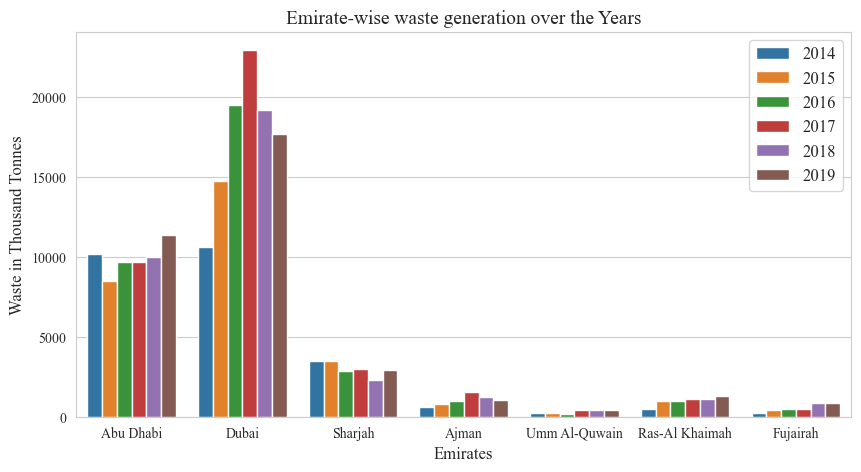

In [36]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(hue='Year', y='Waste', x='State', data=df, palette="tab10")
plt.title('Emirate-wise waste generation over the Years', fontsize=14)
plt.xlabel('Emirates', fontsize=12)
plt.ylabel('Waste in Thousand Tonnes', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
#plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//totalwaste.jpg", dpi=1200)

plt.show()


In [2]:
df = pd.read_csv("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//data//GDP_UAE.csv")
df

,Year,GDP,Projected,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1988,34.07,NaN,NaN,NaN,NaN
1,1989,39.33,NaN,NaN,NaN,NaN
2,1990,50.68,NaN,NaN,NaN,NaN
3,1991,49.30,NaN,NaN,NaN,NaN
4,1992,51.95,NaN,NaN,NaN,NaN
5,1993,52.14,NaN,NaN,NaN,NaN
6,1994,57.40,NaN,NaN,NaN,NaN
7,1995,63.43,NaN,NaN,NaN,NaN
8,1996,72.85,NaN,NaN,NaN,NaN
9,1997,77.17,NaN,NaN,NaN,NaN


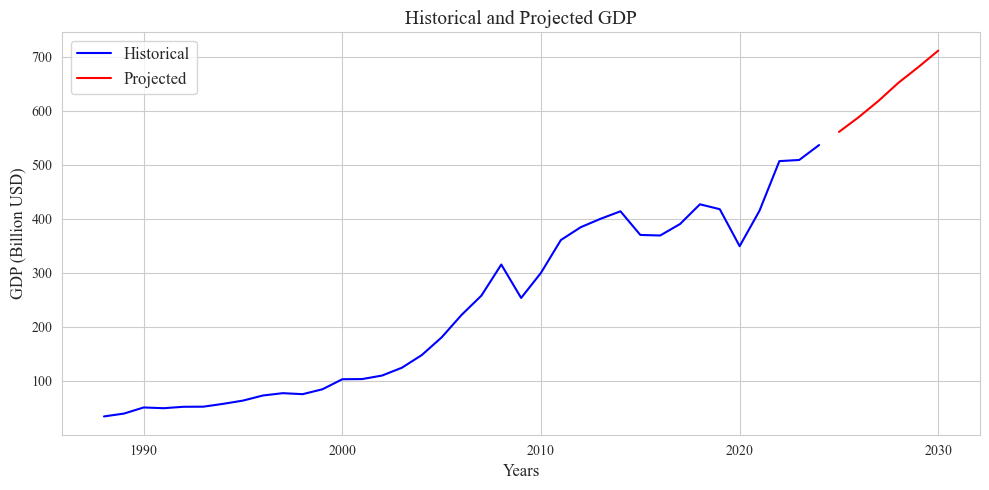

In [8]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='GDP', data=df, label="Historical",color="Blue")
sns.lineplot(x='Year', y='Projected', data=df,label="Projected", color="Red")

plt.title('Historical and Projected GDP', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('GDP (Billion USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig("C://Users//bijoy//Dropbox//PC//Desktop//Mitra//UAE-ch4//GDP.jpg", dpi=1200)

plt.show()
